# Принятие решений в бизнесе на основе данных. Приоритезация гипотез. A/B тест.

# Оглавление
1. Описание провекта  
    1.1 Описание данных  
    1.2 Постановка задач  
2. Импорт библиотек  
3. Выгрузка _orders.csv_ и _visitors.csv_  
    3.1 Краткий вывод  
4. Приоретизация гипотез  
    4.1 Данные _hypothesis.csv_  
    4.2 Краткий вывод  
5. Анализ А/В-теста  
    5.1 Кумулятивная выручка  
    5.2 Кумулятивный средний чек  
    5.3 Относительное изменение кумулятивного среднего чека  
    5.4 Кумулятивное среднее количества заказов на посетителя  
    5.5 Относительное изменение кумулятивного среднего количества заказов на посетителя  
    5.6 **Краткий вывод**  
    5.7 Точечный график стоимостей заказов  
    5.8 95 и 99 перцентили количества заказов на пользователя  
    5.9 Точечный график стоимостей заказов  
    5.10 95 и 99 перцентили количества заказов  
    5.11 Стат. знач. различий в среднем количестве заказов на посетителя между группами по «сырым» данным  
    5.12 Стат. знач. различий в среднем чеке заказа между группами по «сырым» данным   
    5.13 Стат. знач. различий в среднем количестве заказов на посетителя между группами по «очищенным» данным  
    5.14 Стат. знач. различий в среднем чеке заказа между группами по «очищенным» данным  
6. Вывод

## Описание проекта  
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

### Описание данных

Файл _hypothesis_ :  
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл _orders_ :   
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.

Файл _visitors_ :     
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста



### Постановка задач
**Часть 1. Приоритизация гипотез.**

В файле _hypothesis.csv_ 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**  
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах _orders.csv_ и _visitors.csv_.

**Задача**  
Проанализируйте A/B-тест:  
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:  
        1. Остановить тест, зафиксировать победу одной из групп.  
        2. Остановить тест, зафиксировать отсутствие различий между группами.  
        3. Продолжить тест.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
import scipy.stats as stats

## Выгрузка _orders.csv_ и _visitors.csv_

In [2]:
def watch_basics(df):
    print('---Общая информация---')
    display(df.head())
    display(df.info())
    display(df.describe())
    print('---Явные дубликаты---')
    display(df[df.duplicated()].count())
    

In [3]:
orders = pd.read_csv('orders.csv', parse_dates=['date'])
visitors = pd.read_csv('visitors.csv', parse_dates=['date'])

In [4]:
# переименуем для большей читаемости
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id' })

In [5]:
watch_basics(orders)

---Общая информация---


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


---Явные дубликаты---


transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [6]:
watch_basics(visitors)

---Общая информация---


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


---Явные дубликаты---


date        0
group       0
visitors    0
dtype: int64

In [7]:
print('Количество посетителей в группе А: {}'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Количество посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Количество заказов в группе A: {}'.format(len(orders[orders['group']=='A'])))
print('Количество заказов в группе B: {}'.format(len(orders[orders['group']=='B'])))

Количество посетителей в группе А: 18736
Количество посетителей в группе B: 18736
Количество заказов в группе A: 557
Количество заказов в группе B: 640


In [52]:
# Взглянем на максимальную и минимальную даты
min_date = visitors['date'].min()
max_date = visitors['date'].max()
print('Минимальная дата:', min_date.strftime('%d-%m-%Y'))
print('Максимальная дата:', max_date.strftime('%d-%m-%Y'))

Минимальная дата: 01-08-2019
Максимальная дата: 31-08-2019


Что ж, у нас данные за весь август 2019 года. 

In [9]:
people_in_a_and_b_groups = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())
print('Количество человек, попавших в группы А и В:', len(people_in_a_and_b_groups))

Количество человек, попавших в группы А и В: 58


### Краткий вывод

Никаких пропусков или явных дубликатов не найдено ни в первом, ни во втором датафрейме. В _orders_ минимальная выгузка оказалась не 0, поэтому данные далее очищать от пользователей, не купивших ничего, не придется. Но вот максимум выручки сильно больше среднего. Тип данных object занимает лишнее пространоство в памяти. Это странно, но оставим.

В _visitors_ среднее количество посетителей в день 607. В день приходит не менее 361 человека(за заданный все времяв датасете). На первый взгляд, данных достаточно для анализа

## Приоритизация гипотез

### Данные _hypothesis.csv_

In [10]:
hypothesis = pd.read_csv('hypothesis.csv')
watch_basics(hypothesis)

---Общая информация---


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


---Явные дубликаты---


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Никаких пропусков или явных дубликатов. Гипотезам лучше бы быть типом string, нежели object. Также у нас нет гипотиз, где мы бы были абсолютно уверенны, что изменение повлияет именно так. Зато в среднем этот показатель довольно высок. Похоже, компания знает что делает. Всего вариантов для А/В теста 9

In [11]:
# приведение заголовков к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

Применим фреймворк ICE score = (Impact * Confidence) / Efforts  
И параллельно RISE score = (Reach * Impact * Confidence) / Efforts  
_Reach_ — скольких пользователей затронет изменение, которое вы хотите внести;  
_Impact_ — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;  
_Confidence_ — насколько вы уверены, что это изменение повлияет на пользователей именно так;  
_Efforts_ — сколько стоит протестировать эту гипотезу.  

In [12]:
print('Посмотрим на все 9 гипотез:\n')
[print(i + 1, elem) for i,elem in enumerate(hypothesis['hypothesis'])];

Посмотрим на все 9 гипотез:

1 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
2 Запустить собственную службу доставки, что сократит срок доставки заказов
3 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
4 Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
5 Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
6 Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
7 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
8 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
9 Запустить акцию, дающую скидку на товар в день рождения


In [13]:
hypothesis['ICE'] = round(( hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
pd.set_option('display.max_colwidth', False)
display(hypothesis.loc[:,['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По данной оценке явный победитель - "Запустить акцию, дающую скидку на товар в день рождения". А меньше всего веры в изменение фона главной страницы.   
Посмотрим по RICE

In [14]:
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] , 2)
display(hypothesis.loc[:,['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))
pd.set_option('display.max_colwidth', True)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В таком случае, столбец reach имеет большое влияние, тк появляется в метрике RICE, тогда как в ICE его еще нет. Поскольку гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" затрагивает большое количество клиентов, то теперь она выбилась в лидеры(тогда как по ICE была третьей). А вот запуск акции теперь в середине списка. 

### Краткий вывод

В датасете пропусков и дубликаотов нет. Были рассмотрены и приоритезорованы 9 гипотез по RICE и ICE.   
По ICE: лучшей гипотезой считается "Запустить акцию, дающую скидку на товар в день рождения", по RICE: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Такое смещение произошло из-за параметра _Reach_ — скольких пользователей затронет изменение. Неперспективной же в обоих случаях считается изменение фона главной страницы. 

Стоит заметить, что есть неточность в данных. Так, например, не ясно что значит 10 в столбце reach: возможно, принята шкала линейной оценки гипотезы от 0 до 10, где 0 — «охват гипотезы ни на кого не повлияет», а 10 — «гипотеза охватит хотя бы половину пользователей». Будем исходить из предположения, что 10 - это 100% охват

## Анализ A/B-теста

### Кумулятивная выручка

In [15]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [16]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [17]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [18]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders', # кол-во заказов
    'buyers', # кол-во покупателей
    'revenue', # выручка
    'visitors', # кол-во посетителей
]

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

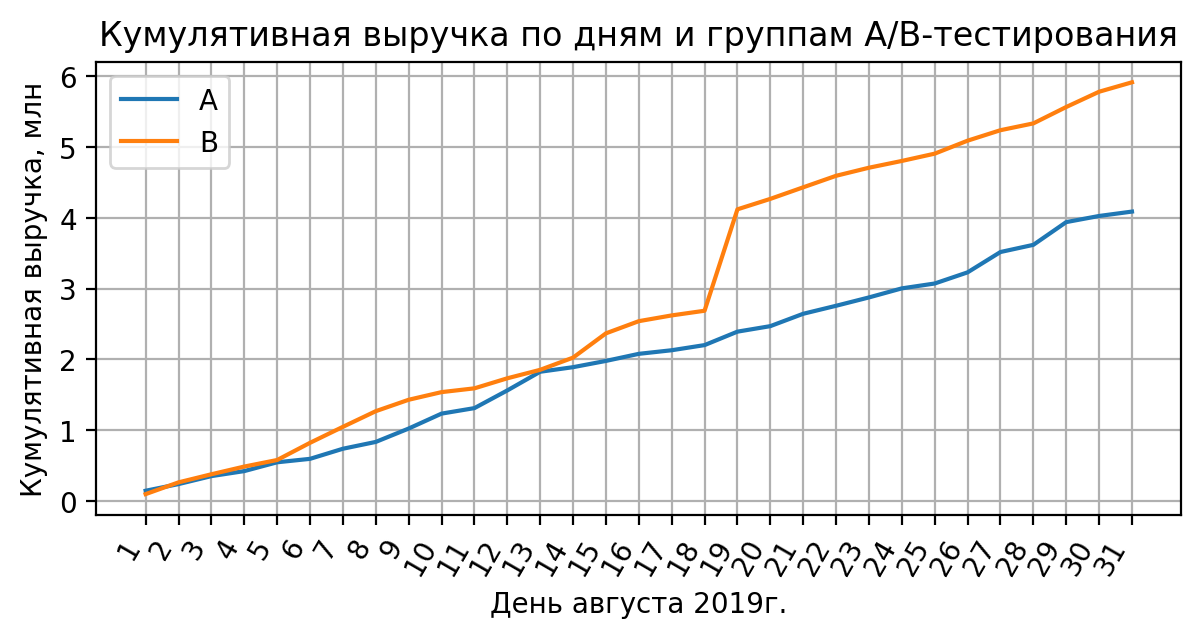

In [20]:
# Зададим размер
plt.figure(figsize=(7,3),dpi=200)

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/1000000, label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/1000000, label='B')

# Доп настройки
plt.grid()
plt.ylabel('Кумулятивная выручка, млн')
plt.xlabel('День августа 2019г.')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xticks(cumulativeRevenueB['date'], labels=list(range(1,32)), rotation=60, ha='right')
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. К тому же, группа B стабильно показывает результат лучше А.
Однако графики выручки группы В в одну дату резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Кумулятивный средний чек

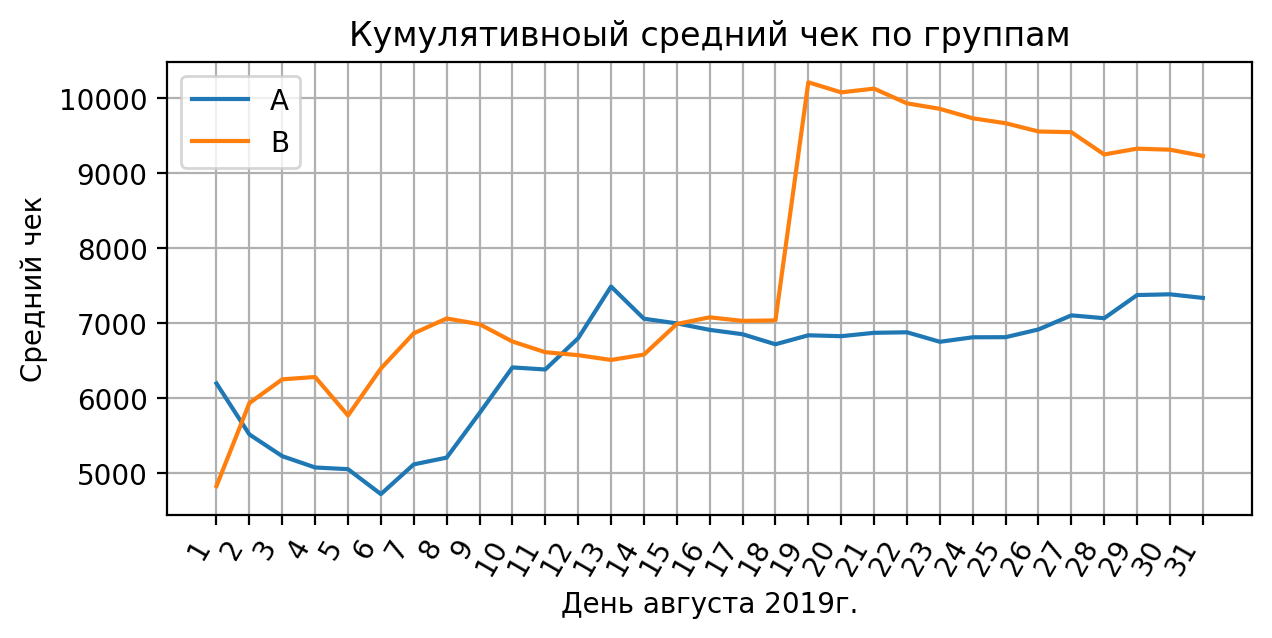

In [21]:
plt.figure(figsize=(7,3),dpi=200)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.ylabel('Средний чек')
plt.xlabel('День августа 2019г.')
plt.title('Кумулятивноый средний чек по группам')
plt.xticks(cumulativeRevenueB['date'], labels=list(range(1,32)), rotation=60, ha='right')
plt.legend();

19 августа 2019г заметен большой всплеск. Чуть позже проверим. Больше похоже на то, что кто-то сделал большую покупку, а потом график стал устанавливаться к стабильной средней цене. Скорее всего, обоим группам нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

In [22]:
display(orders[orders['date']=='2019-08-19'].groupby('group')['revenue'].sum())
display(orders[orders['date']=='2019-08-19'].sort_values(by='revenue', ascending=False).head())

group
A    189743 
B    1429920
Name: revenue, dtype: int64

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B


Действительно, выручка в этот день в группе В в 14 раз больше, чем в А, и все из-за пользователя 1920142716 группы В(покупка на 1 294 500), тогда как медиана чека 3000

### Относительное изменение кумулятивного среднего чека

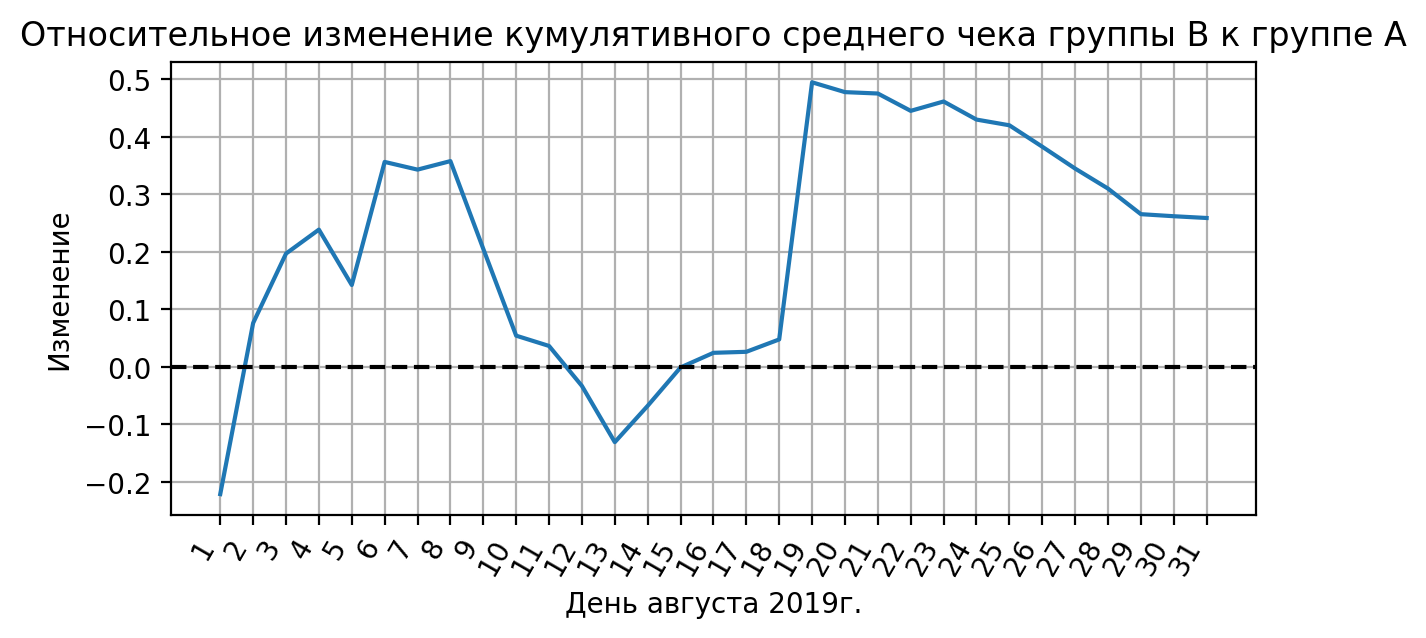

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Масштаб и dpi
plt.figure(figsize=(7,3),dpi=200)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.ylabel('Изменение')
plt.xlabel('День августа 2019г.')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(mergedCumulativeRevenue['date'], labels=list(range(1,32)), rotation=60, ha='right');

В той же точке 19 августа график различия между сегментами резко возрастает и имеет такой же вид, как тест группы В выше. Ничего удивительного - его значение в несколько тысяч раз привышает тест А по среднему чеку. 

### Кумулятивное среднее количества заказов на посетителя

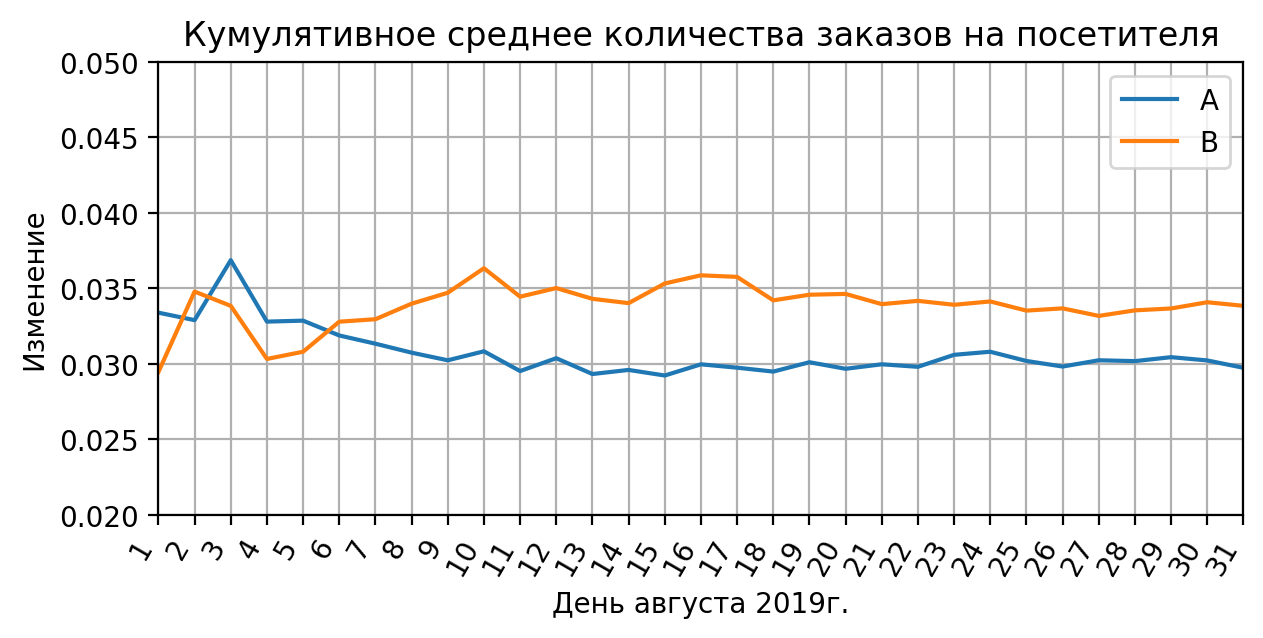

In [24]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

plt.figure(figsize=(7,3),dpi=200)

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([min_date, max_date, 0.02, 0.05]) # задаем масштаб осей, чтобы было лучше видно
plt.grid()
plt.ylabel('Изменение')
plt.xlabel('День августа 2019г.')
plt.title('Кумулятивное среднее количества заказов на посетителя')
plt.xticks(mergedCumulativeRevenue['date'], labels=list(range(1,32)), rotation=60, ha='right');

В начале теста кумулятивное среднее количество заказов колебалось - то больше группа А, то В. Однако посде 8 августа оба выровнялись и кумулятивное среднне количество заказов группы В стало больше: 3,4% против 3%. 

### Относительное изменение кумулятивного среднего количества заказов на посетителя

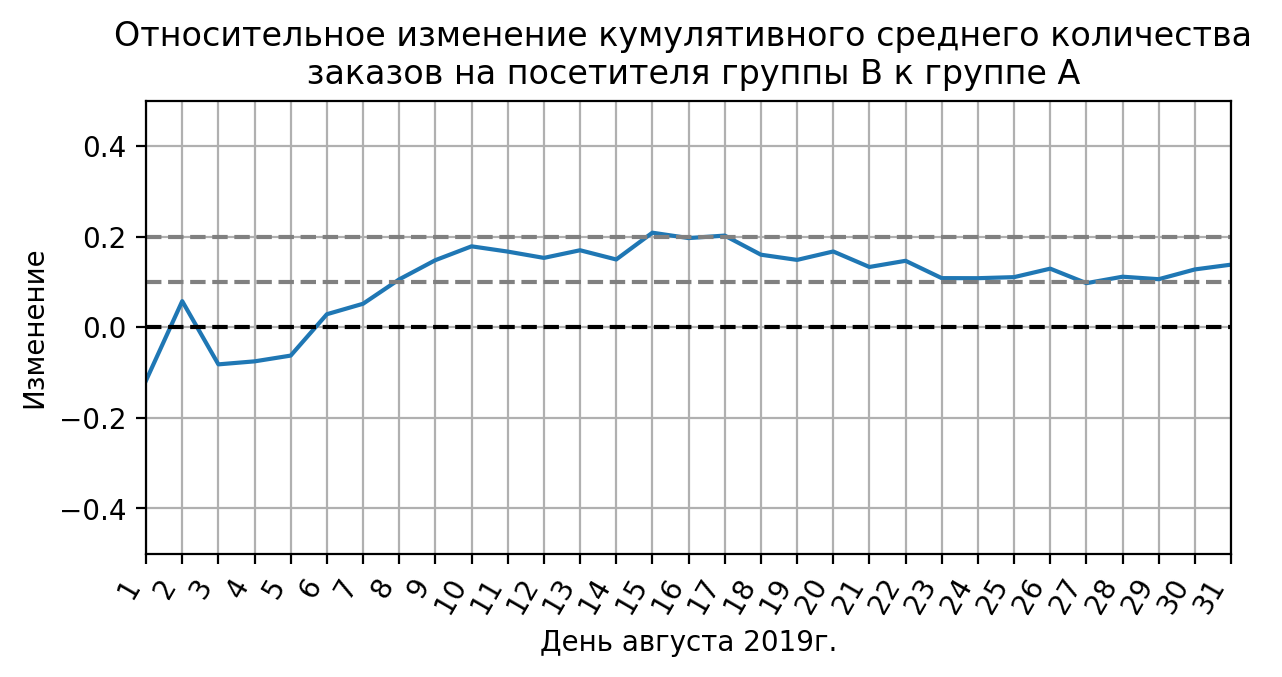

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(7,3),dpi=200)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([min_date, max_date,-0.5, 0.5])
plt.grid()
plt.ylabel('Изменение')
plt.xlabel('День августа 2019г.')
plt.title('Относительное изменение кумулятивного среднего количества \n заказов на посетителя группы B к группе A')
plt.xticks(mergedCumulativeConversions['date'], labels=list(range(1,32)), rotation=60, ha='right');

В начале теста группа В проигрывала группе А, затем вырвалась вперёд. Потом относительно среднее количество заказов на посетителя снова уменьшалось(4-6 августа), но с 7 августа начало расти

### **Краткий вывод**

В целом отношение среднего количества заказов на посетителя установилось между 0,1 и 0,2. Нашелся пользователь, сделавший покупку на миллион. Возможно, компании стоит обратить на него внимание и поблагодарить за преобретение.
Цельный вывод пока делать нельзя, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям

In [26]:
# создадим таблицу с числом заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

      visitor_id  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


Есть пользователи, которые совершили 8,9 и даже парочка с 11 заказами.  

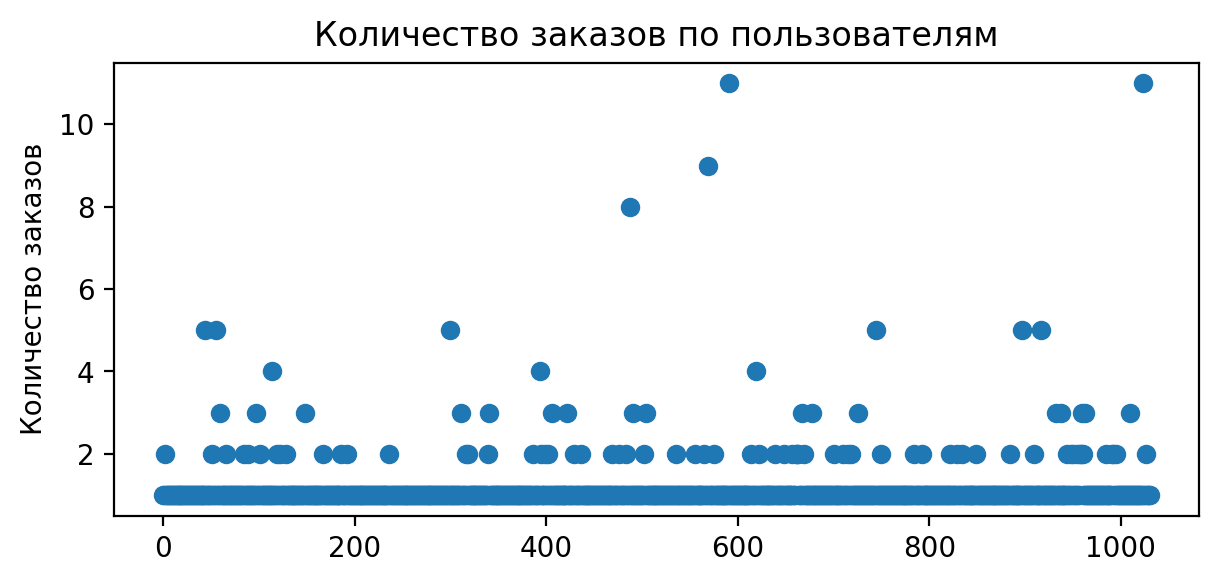

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(7,3),dpi=200)
plt.ylabel('Количество заказов')
plt.xlabel('')
plt.title('Количество заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']);

Больше всего пользователей с 1 заказом. Посмотрим не является ли необычным люди с 2мя покупками

### 95-й и 99-й перцентили количества заказов на пользователя

In [54]:
abnomal_orders_5percent, abnomal_orders_1percent = map(int,np.percentile(ordersByUsers['orders'], [95, 99]))
print('Не более 5% пользователей совершали более', int(abnomal_orders_5percent),'заказов, и не более 1% более', abnomal_orders_1percent) 

Не более 5% пользователей совершали более 2 заказов, и не более 1% более 4


Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять как аномальных пользователей тех, что выше

### Точечный график стоимостей заказов

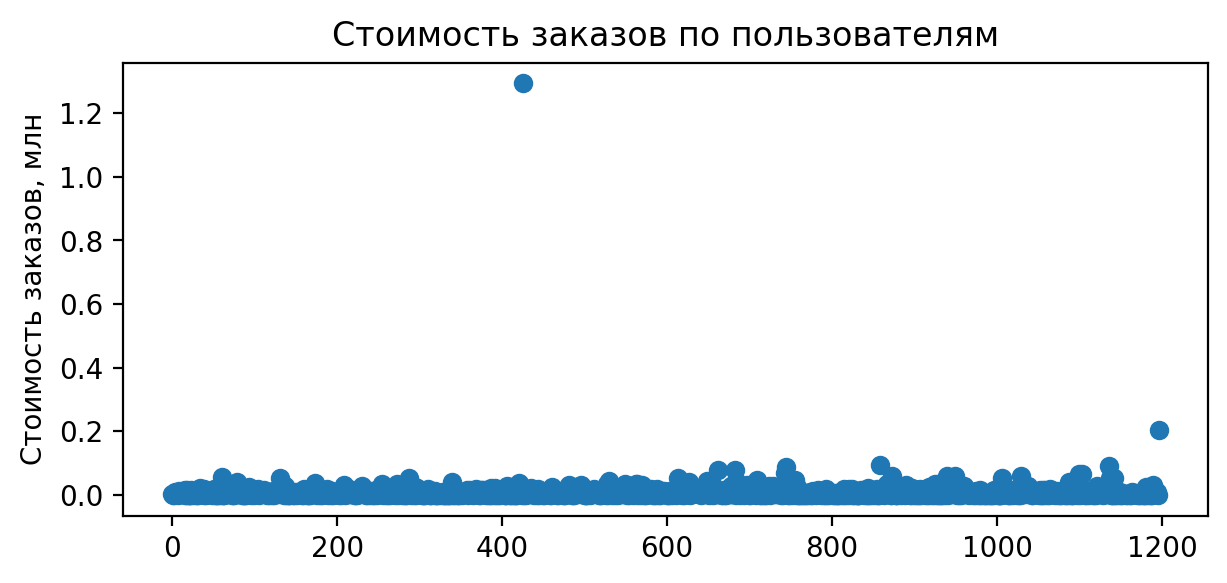

In [29]:
#Изучим распределения стоимостей заказов:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(7,3),dpi=200)
plt.ylabel('Стоимость заказов, млн')
plt.xlabel('')
plt.title('Стоимость заказов по пользователям')
plt.scatter(x_values, orders['revenue']/1000000);

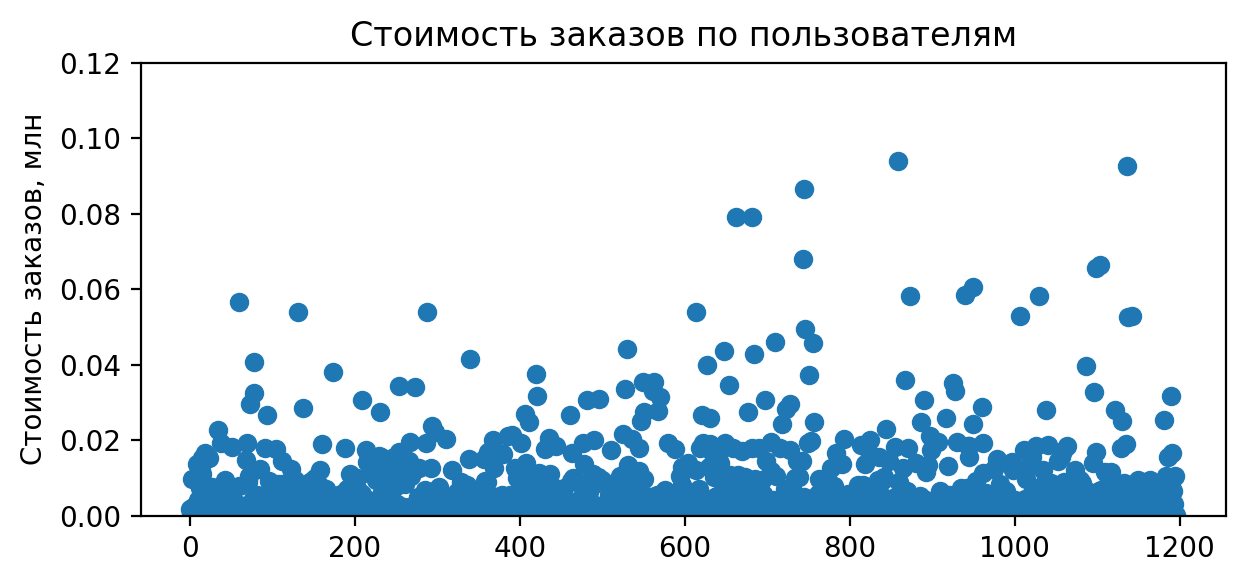

In [30]:
plt.figure(figsize=(7,3),dpi=200)
plt.ylabel('Стоимость заказов, млн')
plt.ylim([0, 0.12])
plt.title('Стоимость заказов по пользователям')
plt.scatter(x_values, orders['revenue']/1000000);

Есть парочка заказов на 200000 и 1200000 - это довольно много. Скорее всего это выбросы. Принято отсеивать от 1% до 5% наблюдений с крайними значениями, чем займемся после анализа сырых данных.

### 95-й и 99-й перцентили стоимости заказов

In [55]:
abnomal_revenue_5percent, abnomal_revenue_1percent  = [round(elem, 2) for elem in np.percentile(orders['revenue'], [95, 99]) ]
print('95 перцентиль:', abnomal_revenue_5percent,', 99 перцентиль:', abnomal_revenue_1percent)

95 перцентиль: 28000.0 , 99 перцентиль: 58233.2


95 перцентиль равен 2800, это значит что 5% элементов больше 2800. Зато единственный выброс относится к 1% тех, что больше 58233,2

Разумно выбрать 28000 на одного пользователя за верхнюю границу стоиомсти заказов, и отсеять как аномальных пользователей тех, что выше

### Стат. знач. различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы:

**Нулевая**: различий в среднем количестве заказов между группами нет.   
**Альтернативная**: различия в среднем между группами есть.

Проверять будем методом mannwhitneyu(U-критерий Манна-Уитни)

In [32]:
alpha = 0.05 # уровень статистической значимости

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [34]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]



In [35]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [36]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [37]:
#создадим ordersByUsersA и ordersByUsersB.Для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

print('Кол-во покупателей в группе A: {}'.format(len(ordersByUsersA)))
print('Кол-во покупок в группе А: {}'.format(ordersByUsersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B: {}'.format(len(ordersByUsersB)))
print('Кол-во покупок в группе B: {}'.format(ordersByUsersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))

Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916


In [38]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
#Тем, кто ничего не заказал, будут соответствовать нули. 
#Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

#np.arange() работает как range(), только создаёт массив индексов в формате np.array, который требуется в pd.Series
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [39]:
p_val = stats.mannwhitneyu(sampleA, sampleB)[1]
print("p-value = {0:.3f}".format(p_val))

if p_val < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print("Относительный прирост среднего кол-ва заказов группы В к А = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Отвергаем нулевую гипотезу
Относительный прирост среднего кол-ва заказов группы В к А = 0.138


Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. 
p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем - в среднем количестве заказов есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А 13,8%

### Стат. знач. различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

**Нулевая**: различий в среднем количестве заказов между группами нет.   
**Альтернативная**: различия в среднем между группами есть.

Проверять будем методом mannwhitneyu(U-критерий Манна-Уитни)

In [40]:
alpha = 0.05 # уровень статистической значимости

In [41]:
p_val = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value = {0:.3f}'.format(p_val))

if p_val < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительное изменение среднего чека в группе B по отношению группы A = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Не получилось отвергнуть нулевую гипотезу
Относительное изменение среднего чека в группе B по отношению группы A = 0.259


p-value больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека меду сегментами 25,9%

### Стат. знач.различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сформулируем гипотезы:

**Нулевая**: различий в среднем количестве заказов между группами нет.   
**Альтернативная**: различия в среднем между группами есть.

Проверять будем методом mannwhitneyu(U-критерий Манна-Уитни)

In [42]:
alpha = 0.05 # уровень статистической значимости

In [43]:
people_in_a_and_b_groups

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [44]:
# Примем за аномальных пользователей тех, кто совершил от 3 заказов и более или совершил заказ дороже 28 000 . 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > abnomal_orders_5percent]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > abnomal_orders_5percent]['visitor_id'],
        ordersByUsersB[ordersByUsersB['visitor_id'].isin(people_in_a_and_b_groups)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > abnomal_revenue_5percent]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей:', abnormalUsers.shape[0])

2       8300375  
1099    148427295
18      199603092
928     204675465
33      232979603
Name: visitor_id, dtype: int64
Количество аномальных пользователей: 113


In [45]:
#Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные
# о заказах — не включая аномальных пользователей. 
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [46]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
p_val = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value = {0:.3f}'.format(p_val))

if p_val < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Относительный прирост среднего кол-ва заказов группы В к А = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.009
Отвергаем нулевую гипотезу
Относительный прирост среднего кол-ва заказов группы В к А = 0.189


p-value все еще меньше 0,05 - статистическая значимость достигнута, как и в случае с сырыми данными. 
Сегмент В лучше сегмента А

### Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы:

**Нулевая**: различий в среднем количестве заказов между группами нет.   
**Альтернативная**: различия в среднем между группами есть.

Проверять будем методом mannwhitneyu(U-критерий Манна-Уитни)

In [47]:
alpha = 0.05 # уровень статистической значимости

In [48]:
p_val = (stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])

print('p-value = {0:.3f}'.format(p_val))

if p_val < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print(
    "Относительное изменение среднего чека в группе B по отношению группы A после очистки данных = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.762
Не получилось отвергнуть нулевую гипотезу
Относительное изменение среднего чека в группе B по отношению группы A после очистки данных = -0.022


Статистически значимых отличий между группами все же нет, если рассматривать в виде среднего чека.
Относительное различие между группами изменилось: относительный прирост среднего группы А к конверсии группы В 2%, тогда как раньше результаты показывали обратное изменение



## Вывод

По кумулятивным метрикам почти постоянно в течение августа и на каждом графике лидировала группа В. По началу возникли сомнения из-за наличия выбросов, обусловленных, как выяснилось, крупными заказами. Однако, даже после очисти данных, лидером осталась группа В, хотя ее средний чек и стал ближе к группе А. Стоит обратить внимание на относительные числа: конверсия пользователей в группе В к группе А до очистки была 13,8%, а после - 18,9%. Таким образом, можно сделать вывод, что можно остановить А/В тест, поскольку группа В выгоднее А.

Привлечь новых платежеспособных поситителей очень сложно - но справиться удалось. В зависимости от вида деятельности бизнеса, возможно, этих людей стоит постараться удержать как лояльных клиентов. 